# Starter Code

In [1]:
import os
scripts_path = os.path.abspath('../scripts')
import importlib.util
spec = importlib.util.spec_from_file_location("helpers", os.path.join(scripts_path, "helpers.py"))
helpers = importlib.util.module_from_spec(spec)
spec.loader.exec_module(helpers)

from joblib import load
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
X_train, X_test, y_train_a, y_test_a = helpers.attempt_data_split()
X_train, X_test, y_train_c, y_test_c = helpers.convert_data_split()

# Analysis

In [3]:
clf_convert = load('../models/knn/convert.joblib')
clf_convert_cv = load('../models/knn/convert_cv.joblib')
clf_attempt = load('../models/knn/attempt.joblib')
clf_attempt_cv = load('../models/knn/attempt_cv.joblib')

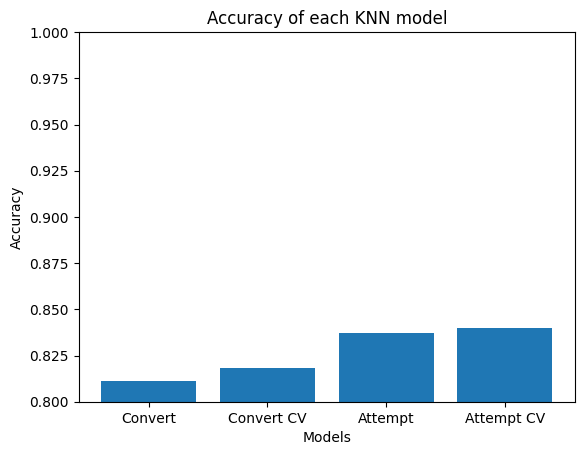

In [7]:
scores = [clf_convert.score(X_test, y_test_c),
          clf_convert_cv.score(X_test, y_test_c),
          clf_attempt.score(X_test, y_test_a),
          clf_attempt_cv.score(X_test, y_test_a)]

labels = ['Convert', 'Convert CV', 'Attempt', 'Attempt CV']

plt.bar(labels, scores)
plt.title('Accuracy of each KNN model')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1)
plt.show()

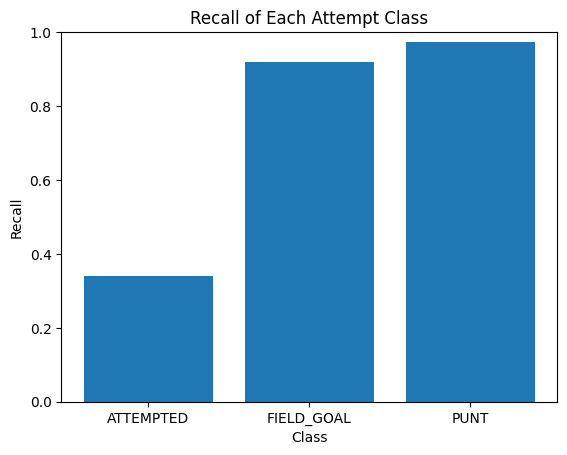

In [5]:
report = classification_report(y_test_a, clf_attempt_cv.predict(X_test), zero_division=0, output_dict=True)

scores = [report["ATTEMPTED"]["recall"],
          report["FIELD_GOAL"]["recall"],
          report["PUNT"]["recall"]]

classes = ['ATTEMPTED', 'FIELD_GOAL', 'PUNT']

plt.bar(classes, scores)
plt.title('Recall of Each Attempt Class')
plt.xlabel('Class')
plt.ylabel('Recall')
plt.ylim(0, 1)
plt.show()

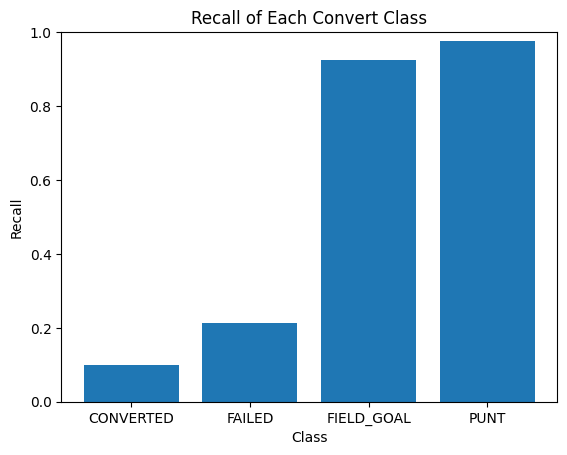

In [6]:
report = classification_report(y_test_c, clf_convert_cv.predict(X_test), zero_division=0, output_dict=True)

scores = [report["CONVERTED"]["recall"],
          report["FAILED"]["recall"],
          report["FIELD_GOAL"]["recall"],
          report["PUNT"]["recall"]]

classes = ['CONVERTED', 'FAILED', 'FIELD_GOAL', 'PUNT']

plt.bar(classes, scores)
plt.title('Recall of Each Convert Class')
plt.xlabel('Class')
plt.ylabel('Recall')
plt.ylim(0, 1)
plt.show()